<a href="https://colab.research.google.com/github/mcarmona8/Business_Case/blob/main/Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

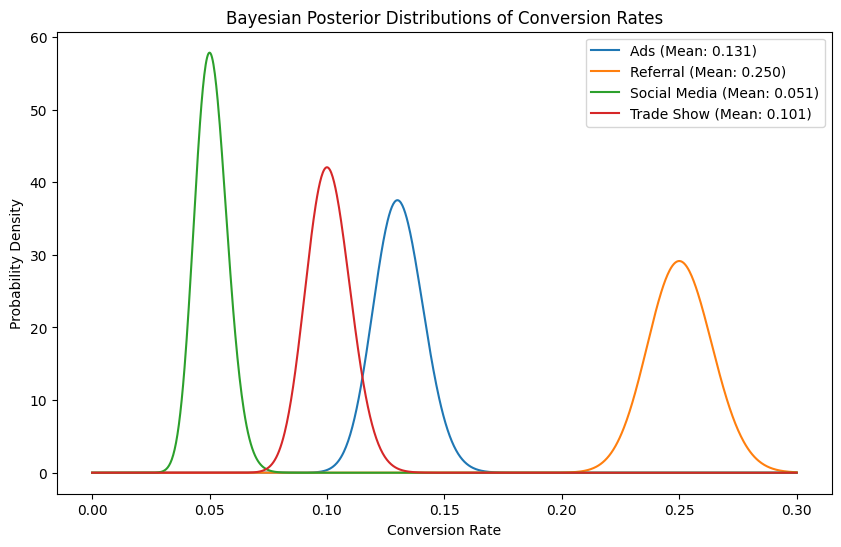

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define prior (weak prior assumption, assuming uniform belief)
alpha_prior = 1
beta_prior = 1

# Define observed conversions & trials (assuming 1000 prospects for each source)
prospect_sources = ["Ads", "Referral", "Social Media", "Trade Show"]
conversion_rates = [0.130, 0.250, 0.05, 0.100]
total_prospects = 1000  # Assumed number of prospects per source

# Compute alpha (successes) and beta (failures) for each source
alpha_posterior = [alpha_prior + (rate * total_prospects) for rate in conversion_rates]
beta_posterior = [beta_prior + total_prospects - (rate * total_prospects) for rate in conversion_rates]

# Generate samples from posterior distribution
x = np.linspace(0, 0.3, 1000)  # Conversion rate range
plt.figure(figsize=(10, 6))

for i, source in enumerate(prospect_sources):
    posterior = stats.beta(alpha_posterior[i], beta_posterior[i]).pdf(x)
    plt.plot(x, posterior, label=f"{source} (Mean: {alpha_posterior[i]/(alpha_posterior[i] + beta_posterior[i]):.3f})")

plt.xlabel("Conversion Rate")
plt.ylabel("Probability Density")
plt.title("Bayesian Posterior Distributions of Conversion Rates")
plt.legend()
plt.show()


In [5]:
# Monte Carlo simulation: Compare samples from Beta distributions
n_samples = 10000
Referral_show_samples = np.random.beta(alpha_posterior[1], beta_posterior[1], n_samples)
Trade_show_samples = np.random.beta(alpha_posterior[3], beta_posterior[3], n_samples)

# Probability that Referral is better than Trade Show
prob_trade_show_better = np.mean(Referral_show_samples > Trade_show_samples)

print(f"Probability that Referral has a higher conversion rate than Trade Shows: {prob_trade_show_better:.4f}")


Probability that Referral has a higher conversion rate than Trade Shows: 1.0000
